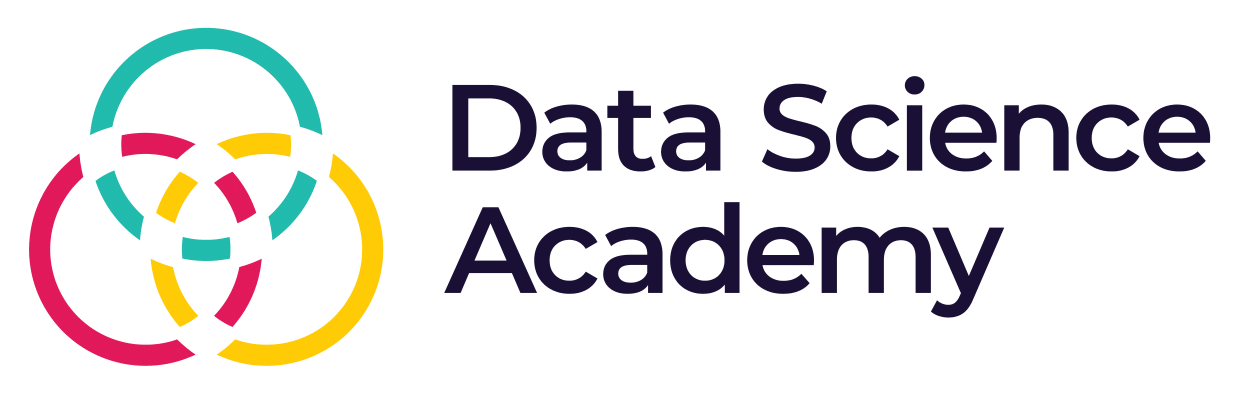

# Applications of Clustering and PCA using Python libraries and public datasets

# K-means

In [76]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [77]:
df = pd.read_csv('Mall_Customers.csv')

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [85]:
cols = df.columns
df.columns = [col.lower() for col in cols]

df.rename(columns={'annual income (k$)' : 'ann_income', 
                    'spending score (1-100)' : 'sp_score'},
                   inplace=True)

df.head()

,customerid,gender,age,ann_income,sp_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

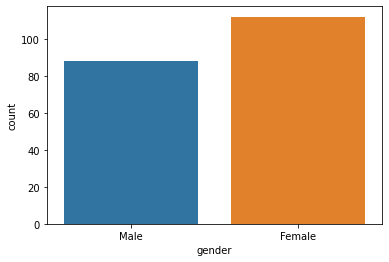

In [19]:
sns.countplot('gender',data=df) # Count Plot of Gender

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='age'>

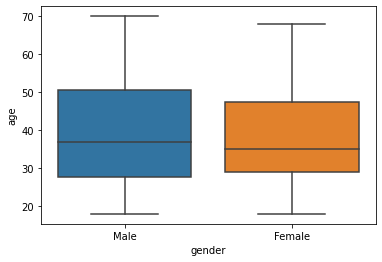

In [20]:
sns.boxplot('gender','age',data=df)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='ann_income'>

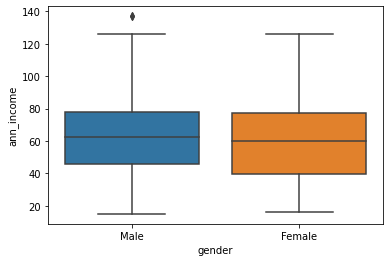

In [21]:
sns.boxplot('gender','ann_income',data=df)

In [22]:
#Let's check the data before clustering. For this purpose, I will use x1=Age and x2=Spending Score (1-100)

In [86]:
X = df.iloc[:, [3, 4]].values

In [89]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
fig = plt.figure(figsize =(10,5))

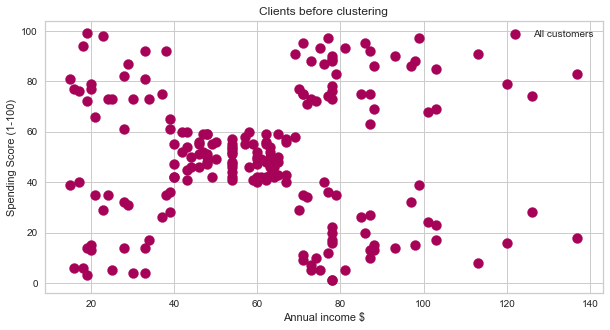

In [92]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='m',label='All customers')
plt.title('Clients before clustering')
plt.xlabel('Annual income $')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Elbow_methode

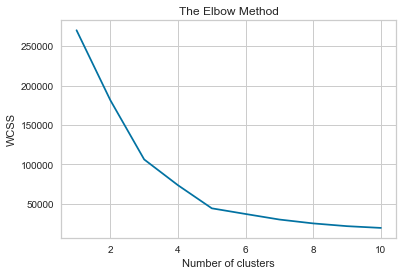

In [95]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



Silhouete_methode

In [96]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5379675585622219
For n_clusters = 7 The average silhouette_score is : 0.5288104473798049
For n_clusters = 8 The average silhouette_score is : 0.45924987052000815


In [134]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [135]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [138]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

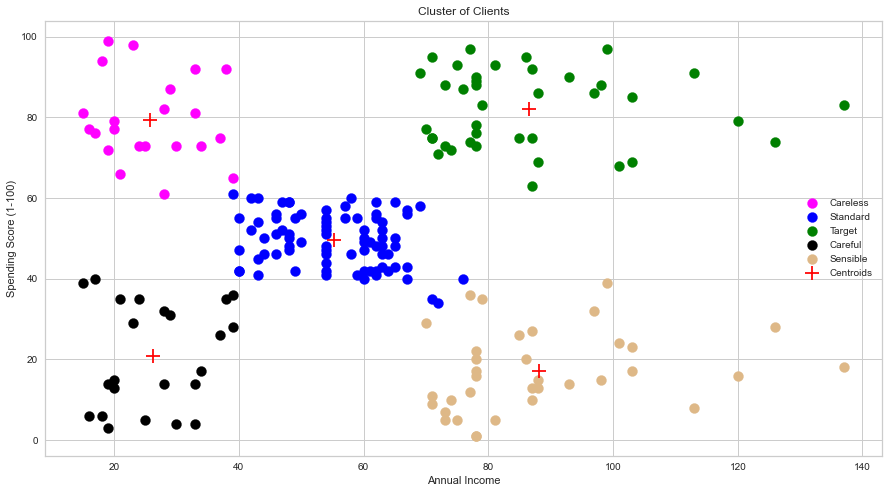

In [137]:
#Lets plot those clusters!
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Careless')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='Careful')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# Hierarchical clustering

<b>Hierarchical clustering </b> (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

- <b>Agglomerative </b>: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- <b>Divisive </b>: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

## Agglomerative Clustering

Initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until 1/ K clusters are formed.

The main advantage is that we don’t need to specify the number of clusters, this comes with a price: performance $O(n^3)$. In sklearn’s implementation, we can specify the number of clusters to assist the algorithm’s performance.

### Algorithm
- Compute the proximity matrix
- Let each data point be a cluster
- Repeat: Merge two closest clusters and update the proximity matrix until 1/ K cluster remains

Ex. - We have six data points {A,B,C,D,E,F}.

- In the initial step, we consider all the six data points as individual clusters as shown in the image below.

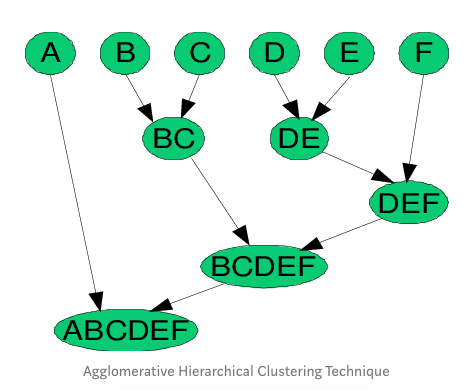

- The first step is to determine which elements to merge in a cluster. Usually, we want to take the two closest elements, according to the chosen distance.We construct a distance matrix at this stage, where the number in the i-th row j-th column is the distance between the i-th and j-th elements. Then, as clustering progresses, rows and columns are merged as the clusters are merged and the distances updated.

#### Computation of proximity/distance matrix

The choice of an appropriate metric will influence the shape of the clusters, as some elements may be close to one another according to one distance and farther away according to another. For example, in a 2-dimensional space, the distance between the point (1,0) and the origin (0,0) is always 1 according to the usual norms, but the distance between the point (1,1) and the origin (0,0) can be 2 under Manhattan distance, $\sqrt2$ under Euclidean distance, or 1 under maximum distance.

Some commonly used metrics for hierarchical clustering are:

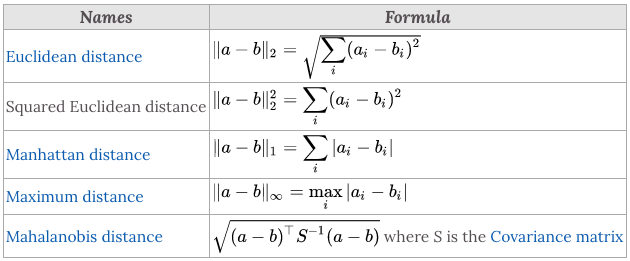

For text or other non-numeric data, metrics such as the Hamming distance or Levenshtein distance are often used.

- Similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F. To calculate the proximity between two clusters, we need to define the distance between them. Usually the distance is one of the following:
     - The maximum distance between elements of each cluster (also called  <b> complete-linkage clustering </b>)
     - The minimum distance between elements of each cluster (also called <b> single-linkage clustering </b>)
     - The mean distance between elements of each cluster (also called <b> average linkage clustering </b>)
     - The sum of all intra-cluster variance.
- Again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
- Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
- Finally, all the clusters are merged together and form a single cluster.



The Hierarchical clustering Technique can be visualized using a Dendrogram.
A Dendrogram is a tree-like diagram that records the sequences of merges or splits.

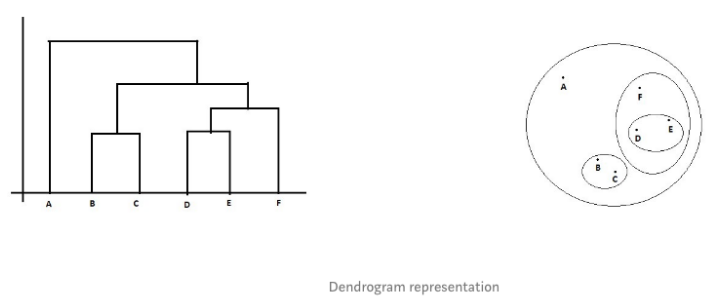

### Example


# Hierarchical

**Importing the dataset**

In [ ]:
# df=pd.read_csv('Mall_Customers.csv')
# df.head()

**Creating the matrix of Features**

In [ ]:
# X=df.iloc[:,[3,4]].values

**Dendogram to find optimal number of clusters**

In [140]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

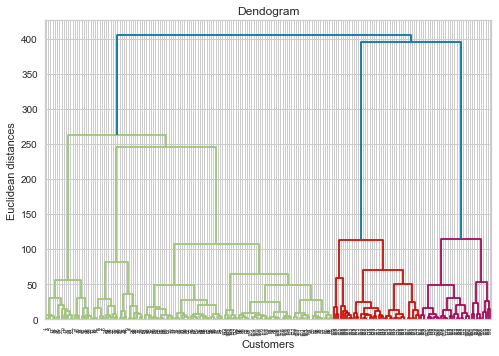

In [55]:
# import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

We have to look at the longest vertical line which is not intercepted by a horizontal line.After we find out the longest vertical line we have to split it horizontally.All the clusters below the split will be our optimium number of clusters.In the above case 3rd line from left is the longest uninterupted line.If we were to split it with a horizontal line we will get five clusters below it.So five will be the optimium number of clusters for our dataset.

**Fitting Hierarchical clustering to data**

In [155]:
# from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [156]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

**Visualizing the cluster**

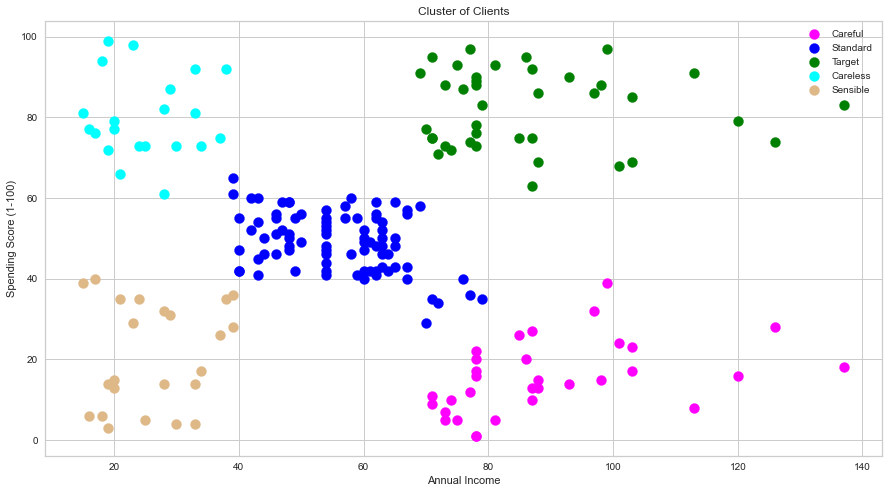

In [157]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='burlywood',label='Sensible')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show()

Based on the above clusters we can do targetted marketing and increase our sales

# Model

In [158]:
df2 = pd.read_csv('musteriler.csv')

In [159]:
df2.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [160]:
cols = df2.columns
df2.columns = [col.lower() for col in cols]

df2.rename(columns={'cinsiyet' : 'gender', 
                    'yas' : 'age',
                    'hacim':'weight',
                    'maas':'income'
                   },
                   inplace=True)

df2.head()

,no,gender,age,weight,income
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [162]:
X_ = df2.iloc[:,3:].values
print("weight",X_[:,0])#weight
print("income",X_[:,1])#income

weight [ 69900  79000  85500  17100   5500  27200  20500  69000  13200  31800
  59200  95800  46200  29800  83000 143500  91300   9800  79500  66400
  25900      0  90900  51800 126800  40800  26400  76100  26500  37200
   4000  34500  47100  95600  35400  41100  46400  10400  50100 111300
 102700  23700  84300  14800   6400  35900  41600  61000  52800 118500
  21500  69200 105600 139000  76300  87600  21800  84100  35700  75400
 125000  97100  45900  26600  54400  13600  58000  83700  32100  19000
  85500  73600  99000  65700  23200   3700 107200  73800  38400  26500
  14400  16600  37900  51900 135500  70600  78600  34500  28500  27200
  80400  15600 133700  55200   6600  55700  29400  86100   2000   2900
  38400 135600  78100  13600  14400  64200  83400  33600  61900 128500
 116200  93000  66800  69400  98100  42000   6600  97900  34700  56800
  26400  53800  93600  76200  68000  45400  24900  17100 119700      0
  24300  48600  51600  59200  53500      0  44800  49200  85900  52500

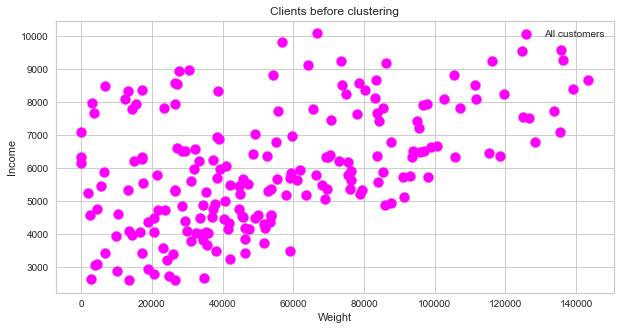

In [163]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X_[:,0],X_[:,1],s=100,c='magenta',label='All customers')
plt.title('Clients before clustering')
plt.xlabel('Weight')
plt.ylabel('Income')
plt.legend()
plt.show()

**K-Means Clustering**

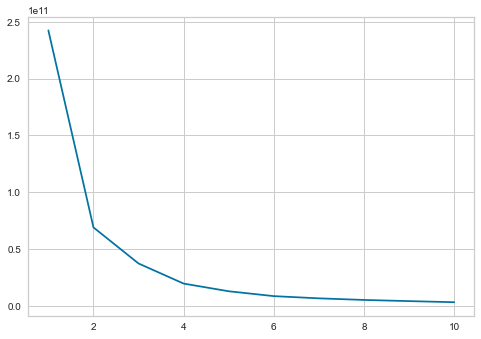

In [63]:
wcss_2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X_)
    wcss_2.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_2)

In [64]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.3273163942500746
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5379675585622219
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4548653400650936
For n_clusters = 9 The average silhouette_score is : 0.4595491760122954


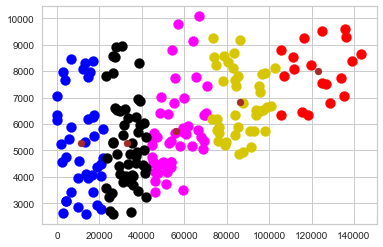

In [166]:
kmeans = KMeans( n_clusters = 5, init = 'k-means++')
y_kmeans2= kmeans.fit_predict(X_)


plt.scatter(X_[y_kmeans2==0,0],X_[y_kmeans2==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X_[y_kmeans2==1,0],X_[y_kmeans2==1,1],s=100,c='red',label='Standard')
plt.scatter(X_[y_kmeans2==2,0],X_[y_kmeans2==2,1],s=100,c='blue',label='Standard')
plt.scatter(X_[y_kmeans2==3,0],X_[y_kmeans2==3,1],s=100,c='black',label='Standard')
plt.scatter(X_[y_kmeans2==4,0],X_[y_kmeans2==4,1],s=100,c='y',label='~')



plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "brown")
plt.show()


**Hierarchical Clustering**

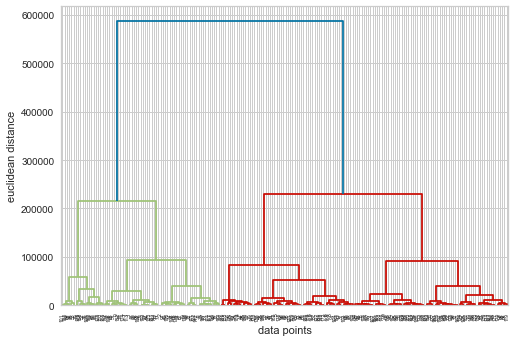

In [68]:
# %% dendogram
merg = linkage(X_,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

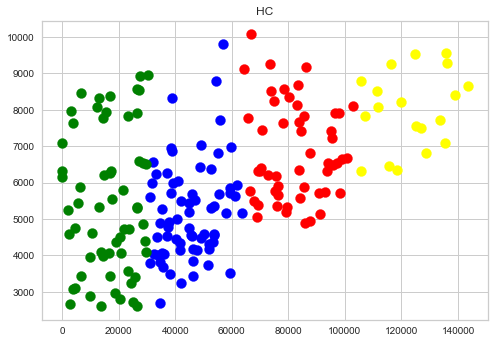

In [69]:
#HC

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_predict = ac.fit_predict(X_)

plt.scatter(X_[hc_predict==0,0],X_[hc_predict==0,1],s=100, c='red')
plt.scatter(X_[hc_predict==1,0],X_[hc_predict==1,1],s=100, c='blue')
plt.scatter(X_[hc_predict==2,0],X_[hc_predict==2,1],s=100, c='green')
plt.scatter(X_[hc_predict==3,0],X_[hc_predict==3,1],s=100, c='yellow')
plt.title('HC')
plt.show()

## Clustering

### Biomechanical features of orthopedic patients

Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

- pelvic incidence
- pelvic tilt
- lumbar lordosis angle
- sacral slope
- pelvic radius
- grade of spondylolisthesis

In [167]:
#We read data
df3 = pd.read_csv("column_2C_weka.csv")

In [168]:
df3.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [170]:
df3["class"].nunique()

2

In [169]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


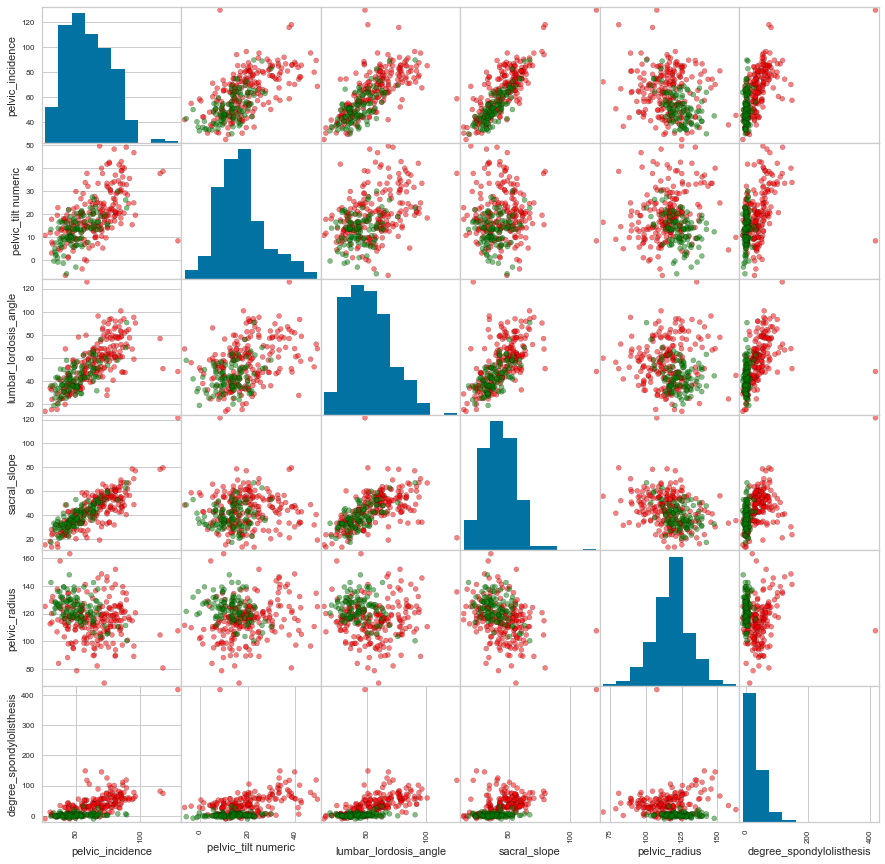

In [74]:
def color_generate():
    colors=[]
    for i in df3.loc[:,'class']:
        if i=='Abnormal':
            colors.append('red')
        else:
            colors.append('green')
    return colors
        
pd.plotting.scatter_matrix(df3.loc[:, df3.columns != 'class'],
                                       c=color_generate(),
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 100,
                                       edgecolor= "black")
plt.show()

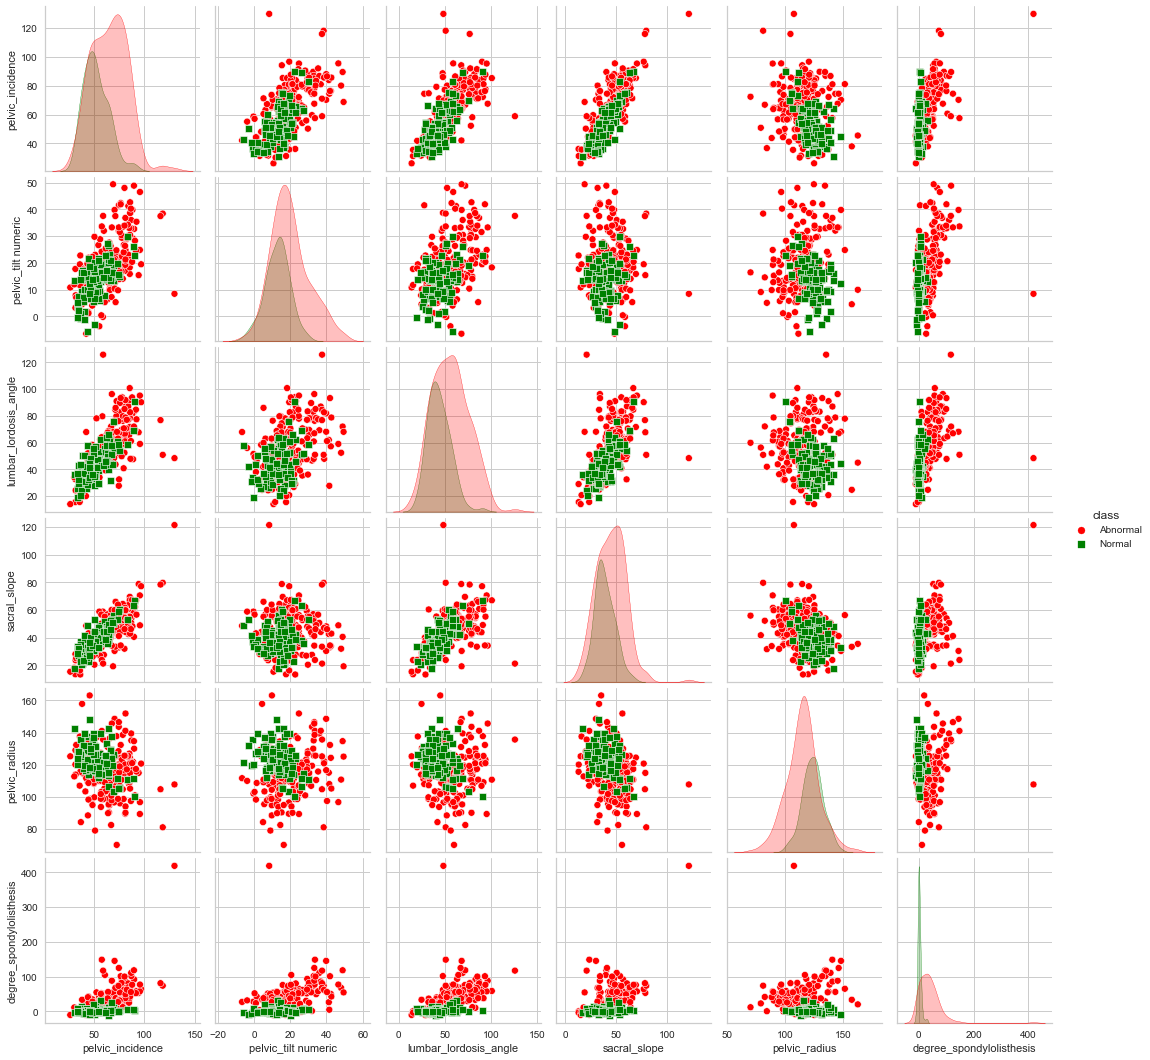

In [75]:
sns.pairplot(df3, hue="class", markers=["o", "s"], palette={"Abnormal":"red","Normal":"green"})

Abnormal    210
Normal      100
Name: class, dtype: int64

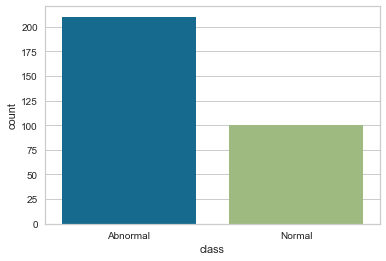

In [171]:
sns.countplot(x="class", data=df3)
df3.loc[:,'class'].value_counts()

<AxesSubplot:>

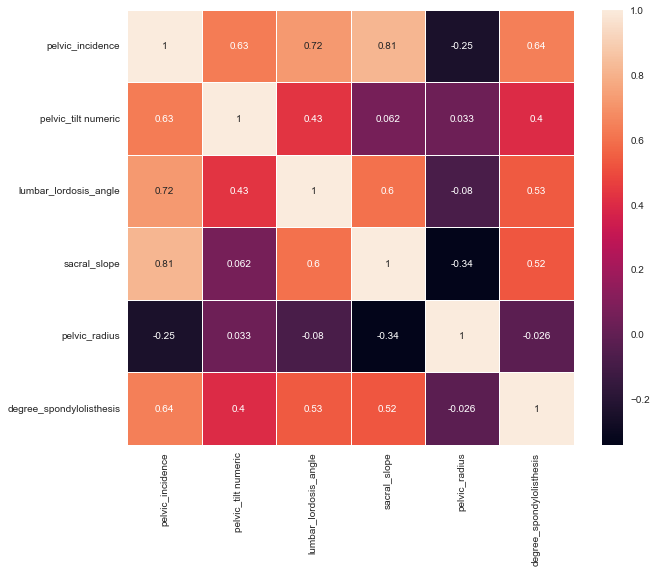

In [172]:
corr=df3.corr()
fig, ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

We have this data but data point in yellow circle if we drop this data we will wrong with separate clusters that's why we drop it

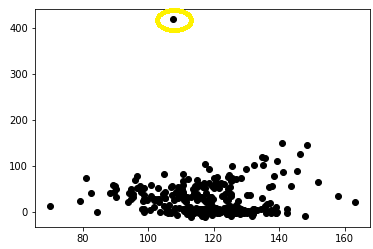

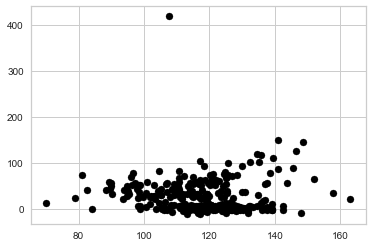

In [173]:
x1 = df3["pelvic_radius"]
x2 = df3["degree_spondylolisthesis"]
plt.scatter(x1 ,x2 ,color = "black")

In [174]:
#We ignore this
mean=df3.degree_spondylolisthesis.mean()
a = df3.degree_spondylolisthesis.max()
df3[df3.degree_spondylolisthesis == a] = mean


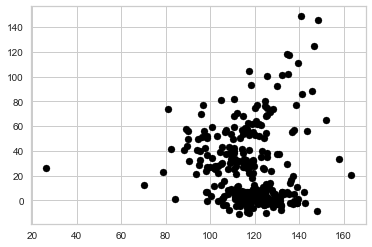

In [175]:
#We use sacral_radius and pelvic incidence for showing our cluster.
plt.scatter(x1 ,x2 ,color = "black")


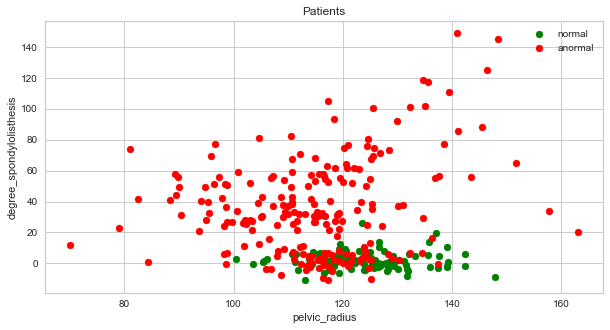

In [176]:
fig = plt.figure(figsize = (10,5))
plt.title('Patients')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.scatter(df3[df3["class"] == "Normal"].pelvic_radius , df3[df3["class"] == "Normal"].degree_spondylolisthesis,color = "green",label="normal")
plt.scatter(df3[df3["class"] == "Abnormal"].pelvic_radius , df3[df3["class"] == "Abnormal"].degree_spondylolisthesis,color = "red",label="anormal")
plt.legend()
plt.show()

In [177]:
cluster_data=pd.DataFrame({"x1":x1,"x2":x2})
cluster_data

,x1,x2
0,98.672917,-0.254400
1,114.405425,4.564259
2,105.985135,-3.530317
3,101.868495,11.211523
4,108.168725,7.918501
...,...,...
305,117.449062,-4.245395
306,114.365845,-0.421010
307,125.670725,-2.707880
308,118.545842,0.214750


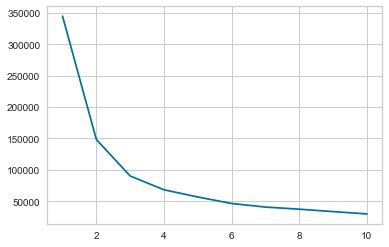

In [178]:
wcss_3 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(cluster_data)
    wcss_3.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_3)


In [179]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_data)

In [180]:
df3['cluster']=y_kmeans

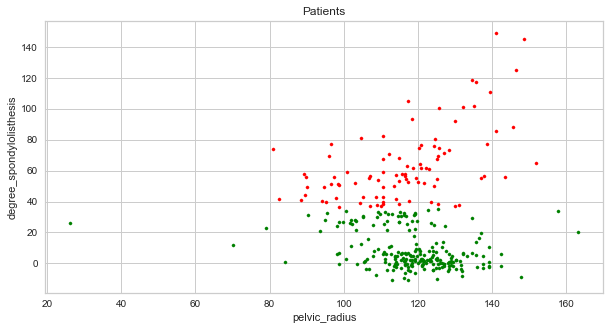

In [181]:
fig = plt.figure(figsize = (10,5))
plt.title('Patients')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.scatter(cluster_data['x1'][y_kmeans==0],cluster_data['x2'][y_kmeans==0],s=10,c='green',label='Normal')
plt.scatter(cluster_data['x1'][y_kmeans==1],cluster_data['x2'][y_kmeans==1],s=10,c='red',label='Anormal')



Checking Accuracy

In [182]:
data_for_acc=pd.read_csv("column_2C_weka.csv")
data_for_acc["class"] = [0 if each == "Abnormal" else 1 for each in data_for_acc["class"]]

In [183]:
data_for_acc

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [184]:
actual_class=data_for_acc["class"]
predicted_class=df3['cluster']

In [185]:
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class)))/100))

accuracy is : 0.993774193548387


**Hierarcihal Cluster**

Other cluster method is hierarcihal cluster it is not easy than kmeans but kmeans the simplest clusters method to me

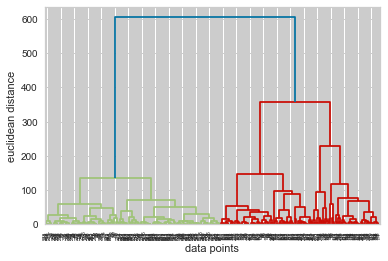

In [186]:

merg = linkage(cluster_data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [187]:

h_c = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster_hc = h_c.fit_predict(cluster_data)

df3["hc_cluster"] = cluster_hc

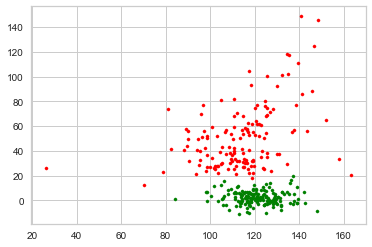

In [188]:
plt.scatter(cluster_data['x1'][cluster_hc==1],cluster_data['x2'][cluster_hc==1],s=10,c='green',label='Normal')
plt.scatter(cluster_data['x1'][cluster_hc==0],cluster_data['x2'][cluster_hc==0],s=10,c='red',label='Anormal')

In [189]:
df3

#Let's we calculate accuracy.
data_for_acc["class"] = [1 if each == "Abnormal" else 0 for each in data_for_acc["class"]]
actual_class=data_for_acc["class"]
predicted_class=df3['hc_cluster']
#data_ac_class = data_ac["class"]
#predict_class = data["label"]
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class)))/100))
# hc_accuracy = int(100 - np.mean(np.abs(data_ac_class - data["label_hc"])*100))


accuracy is : 0.9947419354838709


In [190]:
df3["hc_cluster"] = [0 if each == 1 else 1 for each in df3["hc_cluster"]]

In [191]:
df3

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,cluster,hc_cluster
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,0,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,0,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,0,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,0,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,0,0
...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,0,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,0,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,0,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,0,0


**Comparing Cluster's Method**

We compare two accuracy with plotly plot 

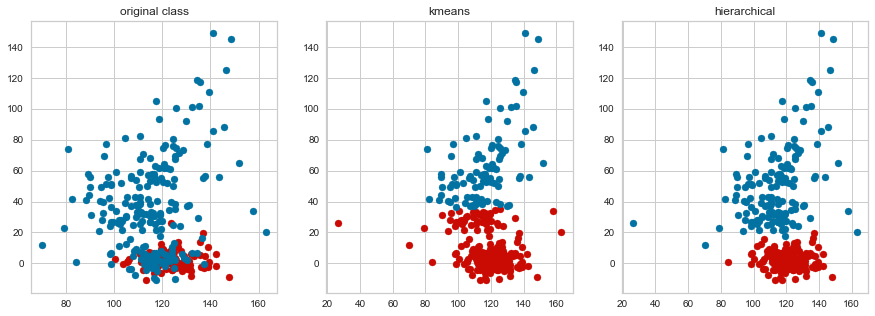

In [196]:
#We compare our model in graph
fig = plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
plt.scatter(x = df3[df3["class"] == "Normal"].pelvic_radius , y = df3[df3["class"] == "Normal"].degree_spondylolisthesis,color = "r")
plt.scatter(x = df3[df3["class"] == "Abnormal"].pelvic_radius , y = df3[df3["class"] == "Abnormal"].degree_spondylolisthesis,color = "b")
plt.title("original class")

plt.subplot(1, 3, 2)
plt.scatter(x = df3[df3.cluster == 0].pelvic_radius,y = df3[df3.cluster == 0].degree_spondylolisthesis , color = "r")
plt.scatter(x = df3[df3.cluster == 1].pelvic_radius,y = df3[df3.cluster == 1].degree_spondylolisthesis , color = "b")
plt.title("kmeans") 

plt.subplot(1, 3, 3)
plt.scatter(x = df3[df3.hc_cluster == 0].pelvic_radius,y = df3[df3.hc_cluster == 0].degree_spondylolisthesis , color = "r")
plt.scatter(x = df3[df3.hc_cluster == 1].pelvic_radius,y = df3[df3.hc_cluster == 1].degree_spondylolisthesis , color = "b")
plt.title("hierarchical")

plt.show()

The accuracy of hierarcihal cluster accuracy is higher than kmeans our data but everytime isn't so 

In [ ]:
#https://towardsdatascience.com/introduction-to-hierarchical-clustering-part-1-theory-linkage-and-affinity-e3b6a4817702

# PCA

In [ ]:
#https://setosa.io/ev/principal-component-analysis/

Main goal of PCA is identify correlation in data, reduce dimension d to k (k<d) while retaining relevant information.
Find $k$ directions, vectors $u^1$,$u^2$...$u^k$ onto which projection error is the minimum.

<img src="pca.jpg">

Steps in PCA:
- Mean normalization and feature scaling
- Creating covariance matrix and calcuate svd (singular value decomposition)
- Calculating eigenvalues and eigenvectors
- Sort eigenvalues
- Select 'k' eigenvectors
- Constructs projection matrix 'w' from 'k' eigenvectors
- Transform original dataset 'X' via 'w' to obtain 'k' dimensional space 'Y'

In [206]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [207]:
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [208]:
# Yuxarıdakı datada X-lər çaxırın kimyəvi göstəriciləri, y isə clusteringdən sonrakı market seqmentasiyasını bildirir. 
# Növbəti mərhələ bütün X-lari daxil etməklə Logistic Regression əsasında y-i predict etməkdir

In [209]:
y.shape

(178,)

In [210]:
X.shape

(178, 13)

In [211]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#PCA tətbiq olunanda əvvəlcə mütləq feature scaling olmalıdır
#We do this on the training set of data.

#1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.

#2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.

#3.Fit_transform(): joins the fit() and transform() method for transformation of dataset.

In [ ]:
# Applying PCA

In [213]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [214]:
explained_variance

array([0.36722576, 0.19231879])

In [215]:
X_train

array([[-2.21627675, -0.99947455],
       [-1.76925781,  1.61300784],
       [ 1.17230703,  2.17064305],
       [-2.6014977 , -1.609546  ],
       [ 1.86604905,  0.25746789],
       [ 2.49349602, -1.37197296],
       [ 0.99055658,  2.21283977],
       [-0.31170514,  2.33942943],
       [-0.27666207,  2.28546079],
       [ 2.14355466, -1.13229538],
       [-3.01518615, -0.22042782],
       [ 1.97545232,  1.23483092],
       [-2.14836544, -0.97737265],
       [ 2.11177177, -2.38185703],
       [-2.27974752, -0.17171001],
       [-3.02367296, -0.22662921],
       [ 2.61693584, -0.96025772],
       [-1.19962285, -3.60637471],
       [ 2.63283998, -0.01968345],
       [ 0.29070953,  2.22881352],
       [-2.7250823 , -2.59097738],
       [-2.54768702, -0.38218125],
       [ 1.78508956,  0.84083107],
       [-2.80389949, -0.34883473],
       [-2.88844587, -1.8830148 ],
       [ 1.33095558,  0.05053056],
       [-2.45255261,  0.14391294],
       [-2.28093414,  0.52369861],
       [ 1.26560815,

In [216]:
X_test

array([[ 2.18260094, -1.07829946],
       [-2.55593867, -1.87697451],
       [ 2.22444866,  1.71273398],
       [ 2.47922076, -1.43371292],
       [-0.30571137,  0.52687402],
       [ 1.3255477 , -0.27195655],
       [ 2.05158469, -1.59395079],
       [-3.10751089, -0.64610518],
       [-0.14844229,  2.14664793],
       [-1.14299241,  2.14743815],
       [-2.20120605, -0.19908507],
       [-4.17276513, -0.45738707],
       [ 2.99813418, -2.29904863],
       [ 2.38719992,  1.19997429],
       [-2.20545923, -1.91439084],
       [ 1.02662939,  3.29744042],
       [ 1.84698292, -1.60943482],
       [ 3.45405176, -2.7251246 ],
       [-1.73086275,  0.91008161],
       [ 2.9208138 , -0.90391124],
       [ 2.43735859,  1.57100455],
       [ 1.20115864, -0.13158356],
       [ 1.03185276, -0.8637291 ],
       [ 0.59296766,  2.06390864],
       [-1.41732546,  1.51176057],
       [-0.08198501,  1.92253218],
       [ 0.16563529,  1.17248346],
       [-0.60668664,  2.2941131 ],
       [-1.19514078,

In [217]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [219]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

In [220]:
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [222]:
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [223]:
accuracy_score(y_test, y_pred)

0.9722222222222222

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


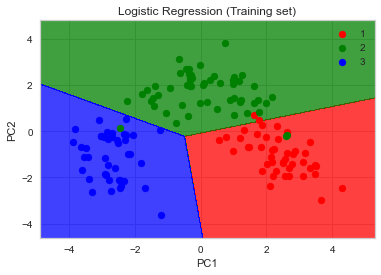

In [224]:
# Visualising the Training set results

X_set, y_set = X_train, y_train
#minimum və maximum dəyərlərin köməyi ilə x1 və x2 (PCA1 və (PCA2) oxlarının aralığı təyin olunur)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


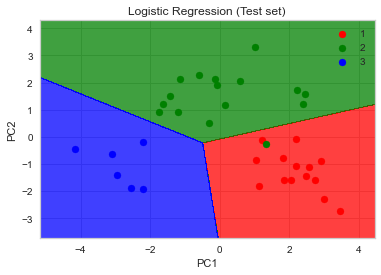

In [225]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()